In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras import layers
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import PolynomialFeatures

In [18]:
df = pd.read_csv("trial_plot.csv")
df.head()

,Compound Name,Type,bp,mu,Source(s)
0,NaN,NaN,NaN,NaN,NaN
1,Methane,n-Alkane,-162.0,0.0,NaN
2,Ethane,n-Alkane,-89.0,1.0,NaN
3,Propane,n-Alkane,-42.0,2.0,NaN
4,Butane,n-Alkane,-0.5,3.0,NaN


Text(0, 0.5, 'Boiling Point')

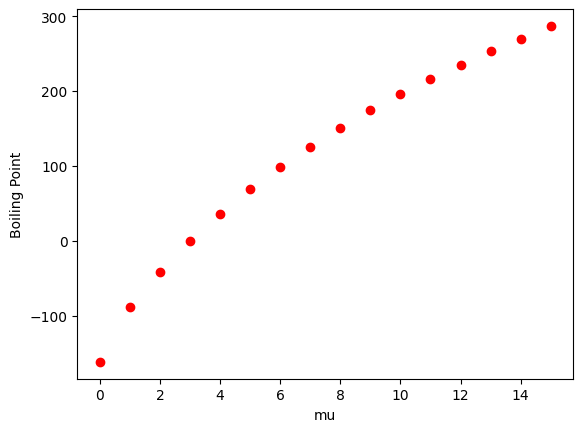

In [20]:
plt.scatter(df['mu'], df['bp'], color='red', label='Actual Data')
plt.xlabel('mu')
plt.ylabel('Boiling Point')

In [17]:
# Create features
# X = df[['mu']]  # Primary feature
# X['n'] = X['mu'] + 1  # Number of carbons
# X['mol_weight'] = 14.03 * X['n']  # Approximate molecular weight
# X = X.values  # Convert to numpy array

# Target variable
X= df['mu'].values.reshape(-1,1)
y=df['bp'].values.reshape(-1,1)

#Clean the array
X_clean = X[~np.isnan(X)]
y_clean = y[~np.isnan(y)]

# #Transform features
# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X_clean.reshape(-1,1))

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

In [4]:
X_clean = X_scaled[~np.isnan(X_scaled)]
y_clean = y_scaled[~np.isnan(y_scaled)]

In [5]:
model=keras.Sequential(
    [
        tf.keras.Input(shape=(1,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu',name='layer2'),
        layers.Dense(1,activation='linear', name='layer3')
    ]
)

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

In [235]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005,clipnorm=1.0),
)

early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=50,          # Wait 5 epochs after min loss
    restore_best_weights=True
)

history = model.fit(
    X_clean,y_clean,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 0.0304 - val_loss: 0.0066
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0333 - val_loss: 0.0125
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0270 - val_loss: 0.0062
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0211 - val_loss: 0.0018
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0206 - val_loss: 1.3149e-04
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0215 - val_loss: 2.0887e-04
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0167 - val_loss: 7.1977e-05
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0134 - val_loss: 7.9121e-04
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0177 - val_loss: 0.0035
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0149 - val_loss: 0.0071
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0110 -

In [236]:
mu = 5
scaled_mu = scaler_X.transform([[mu]])
predicted_bp_scaled = model.predict(scaled_mu)
predicted_bp = scaler_y.inverse_transform(predicted_bp_scaled)
print(f"Predicted bp for mu=6: {predicted_bp[0][0]:.1f}°C (Actual: 68.7°C)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted bp for mu=6: 66.2°C (Actual: 68.7°C)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


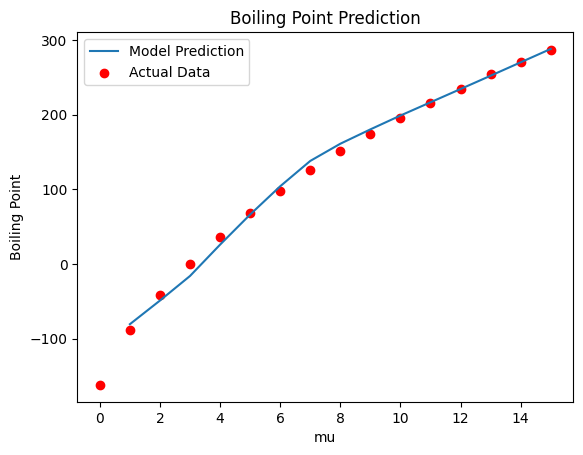

In [237]:
mu_vals = np.arange(1,16).reshape(-1, 1)
mu_scaled = scaler_X.transform(mu_vals)
bp_scaled_pred = model.predict(mu_scaled)
bp_pred = scaler_y.inverse_transform(bp_scaled_pred)

plt.plot(mu_vals, bp_pred, label='Model Prediction')
plt.scatter(df['mu'], df['bp'], color='red', label='Actual Data')
plt.legend()
plt.xlabel('mu')
plt.ylabel('Boiling Point')
plt.title('Boiling Point Prediction')
plt.show()